In [1]:
import cv2
import numpy as np
import time
import tensorflow as tf
import matplotlib.pyplot as plt

In [7]:
# Define a function to draw text to the screen 
def draw_text(img, text, font=cv2.FONT_HERSHEY_PLAIN, pos=(0, 0),
          font_scale=3, font_thickness=2,
          text_color=(0, 255, 0), text_color_bg=(255, 255, 255)):
    
    x, y = pos
    text_size, _ = cv2.getTextSize(text, font, font_scale, font_thickness)
    text_w, text_h = text_size
    cv2.rectangle(img, pos, (x + text_w, y + text_h), text_color_bg, -1)
    cv2.putText(img, text, (x, y + text_h + font_scale - 1), font, font_scale, text_color, font_thickness)

    return text_size

In [8]:
# Define labels and the model to use
labels = ['paper', 'rock', 'scissor']
model = tf.keras.models.load_model('model_my_data_781,923_0.926')

In [9]:
# Run the video

cap = cv2.VideoCapture(0)
while(True):
    # Read form the camara
    ret, frame_original = cap.read()
    
    # Set greyscale and threshold values to use as the model input
    frame = cv2.cvtColor(frame_original, cv2.COLOR_BGR2GRAY)
    ret, frame = cv2.threshold(frame,180,255,cv2.THRESH_BINARY)
    
    # Resize for the model
    frame = cv2.resize(frame, (128,128), interpolation = cv2.INTER_AREA)
    
    # Resize to see better on camera 
    frame_resized = cv2.resize(frame, (512,512))#, interpolation = cv2.INTER_AREA)
    frame_display = frame_resized # DEBUG temporary variable 
    
    # Predict the value and draw the text on the frame 
    prediction = model.predict(np.resize(frame,(1,128,128,1))/255) 
    draw_text(frame_display, labels[np.argmax(prediction)], pos=(20,20))
    
    # Show the frame
    cv2.imshow('OpenCv', frame_display)
    
    draw_text(frame_display, labels[np.argmax(prediction)], pos=(20,20))
    
    
    # Set the Q key to stop the video
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

In [11]:
# Save images for training 

cap = cv2.VideoCapture(0)
labels = ['paper' , 'rock', 'scissor']
k = [1,1,1]
while(True):
    # Read form the camara
    ret, frame_original = cap.read()
    
    # Set greyscale and threshold values to use as the model input
    frame = cv2.cvtColor(frame_original, cv2.COLOR_BGR2GRAY)
    ret, frame = cv2.threshold(frame,180,255,cv2.THRESH_BINARY)
    
    # Resize for the model
    frame = cv2.resize(frame, (128,128), interpolation = cv2.INTER_AREA)
    
    # Resize to see better on camera 
    #frame_resized = cv2.resize(frame, (512,512))#, interpolation = cv2.INTER_AREA)
    frame_display = frame # DEBUG temporary variable 
    
    #draw_text(frame_display, labels[np.argmax(prediction)], pos=(20,20))
    aux = cv2.waitKey(1);
    if aux & 0xFF == ord('p'):
        cv2.imwrite("my_data/paper/paper%d.jpg" % k[0], frame)
        draw_text(frame_display, 'paper', pos=(20,20))
        k[0] += 1
    if aux & 0xFF == ord('r'):
        cv2.imwrite("my_data/rock/rock%d.jpg" % k[1], frame)
        draw_text(frame_display, 'rock', pos=(20,20))
        k[1] += 1
    if aux & 0xFF == ord('s'):
        cv2.imwrite("my_data/scissor/scissor%d.jpg" % k[2], frame)
        draw_text(frame_display, 'scissor', pos=(20,20))
        k[2] += 1
    
    # Show the frame
    cv2.imshow('OpenCv', frame_display)
    
    # Set the Q key to stop the video
    if aux & 0xFF == ord('q'):
        break
    
cap.release()
cv2.destroyAllWindows()



Time per prediction [ms]: 55.929


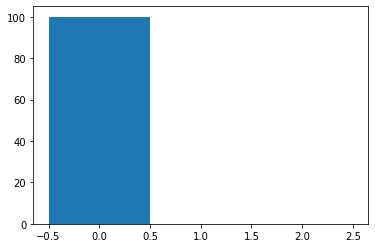

In [5]:
# See how long it takes to predict with the selected model


N = 100
test_array = np.random.randint(2,size=(1,128,128,1,N))
results = np.zeros((N))

start = time.time()
for i in range(N):
    prediction = model.predict(test_array[:,:,:,:,i]) 
end = time.time() 

print('Time per prediction [ms]: ' + str(np.round(1000*(end-start)/N,3)))

for i in range(N):
    prediction = model.predict(test_array[:,:,:,:,i]) 
    results[i] = np.argmax(prediction)

plt.hist(results,[0,1,2,3],align='left')
plt.show()